In [1]:
import pandas as pd

# CSV dosyasını yükleyelim
file_path = 'food.csv'
df = pd.read_csv(file_path)

# İlk birkaç satırı inceleyelim
df.head()


,name,text,ingredient
0,Breakfast for the lazy,"Put cottage cheese in a wide bowl, add an egg,...","Chicken egg: 1 piece, soft cottage cheese: 200..."
1,Breek breakfast,"Rinse buckwheat, pour 2 cups of boiling water,...","Buckwheat cereal: 1 cup, chopped parsley: to t..."
2,Childhood breakfast,Grate the carrots and green apple on the middl...,"Carrots: 1 piece, apple: 1 piece, oranges: 1 p..."
3,French croutons for breakfast,Mix the egg with milk.Salt.Dip the pieces of t...,"Baton: 3 pieces, milk: 2 tablespoons, chicken ..."
4,Low -calorie breakfast,Boil the egg boiled.Cut the cheese and tomatoe...,"Green salad: 0.1 bundles, chicken eggs: 1 piec..."


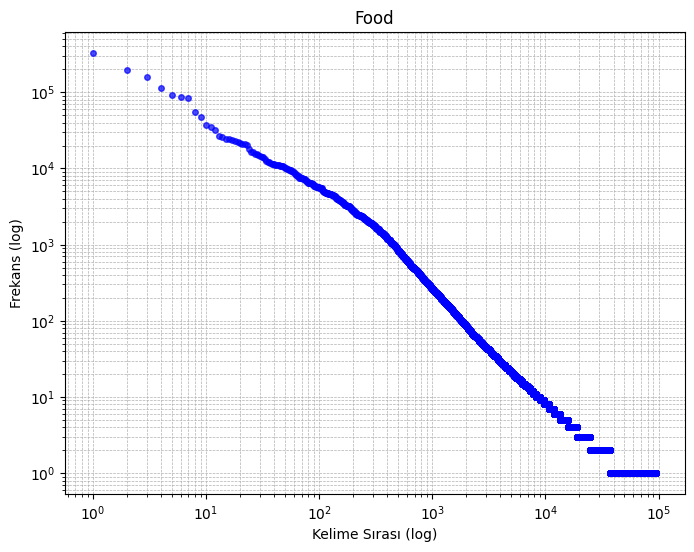

In [2]:
import re
import nltk
import matplotlib.pyplot as plt
import numpy as np

# Metin verisini al
metin = df['text'].dropna().str.cat(sep=' ')  # Metinleri birleştiriyoruz

# Metni küçük harfe çeviriyoruz ve temizliyoruz
metin = re.sub(r'[^a-zA-Z0-9\s]', '', metin.lower())

# Kelimeleri ayırıyoruz
kelimeler = metin.split()

# Kelime frekanslarını hesaplıyoruz
word_freq = {}
for word in kelimeler:
    word_freq[word] = word_freq.get(word, 0) + 1

# Frekansları azalan şekilde sıralıyoruz
sorted_freqs = sorted(word_freq.values(), reverse=True)

# Rank (sıralama) oluşturuyoruz
ranks = np.arange(1, len(sorted_freqs) + 1)

# Log-log grafiğini çiziyoruz
plt.figure(figsize=(8, 6))
plt.loglog(ranks, sorted_freqs, marker="o", linestyle="none", markersize=4, alpha=0.7, color="b")

# Grafik etiketleri
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Frekans (log)")
plt.title("Food")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Grafiği göster
plt.show()


In [3]:
import nltk
from nltk.corpus import stopwords
import re

# NLTK stopwords listesi indirilmeli (ilk çalıştırmada)
nltk.download('stopwords')

# İngilizce stopwords listesi
stop_words = set(stopwords.words('english'))

# Stop word removal fonksiyonu
def remove_stop_words(text):
    # Noktalama işaretlerini ve sayıları temizleyip, kelimelere ayıralım
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    words = text.split()
    # Stop word'leri çıkarma
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Örnek veri üzerinden uygulama
df['cleaned_text'] = df['text'].apply(remove_stop_words)

# İlk 5 satırda stop word'lerin çıkarıldığını görelim
df[['text', 'cleaned_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\husey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,cleaned_text
0,"Put cottage cheese in a wide bowl, add an egg,...",put cottage cheese wide bowl add egg sugar flo...
1,"Rinse buckwheat, pour 2 cups of boiling water,...",rinse buckwheat pour cups boiling water salt c...
2,Grate the carrots and green apple on the middl...,grate carrots green apple middle graterremove ...
3,Mix the egg with milk.Salt.Dip the pieces of t...,mix egg milksaltdip pieces loaf egg mixture si...
4,Boil the egg boiled.Cut the cheese and tomatoe...,boil egg boiledcut cheese tomatoesmix ingredie...


In [5]:
# Tokenization ve Lowercasing işlemi
def tokenize_and_lowercase(text):
    # Noktalama işaretlerini ve sayıları temizleyip, kelimelere ayıralım
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Sayıları ve noktalama işaretlerini temizleyelim
    words = text.split()  # Kelimelere ayıralım
    # Küçük harfe dönüştürelim
    return [word.lower() for word in words]

# "cleaned_text" üzerinden tokenization ve lowercasing işlemi
df['processed_text'] = df['cleaned_text'].apply(tokenize_and_lowercase)

# İlk 5 satırdaki tokenized ve lowercase edilmiş metni görelim
df[['cleaned_text', 'processed_text']].head()


,cleaned_text,processed_text
0,put cottage cheese wide bowl add egg sugar flo...,"[put, cottage, cheese, wide, bowl, add, egg, s..."
1,rinse buckwheat pour cups boiling water salt c...,"[rinse, buckwheat, pour, cups, boiling, water,..."
2,grate carrots green apple middle graterremove ...,"[grate, carrots, green, apple, middle, graterr..."
3,mix egg milksaltdip pieces loaf egg mixture si...,"[mix, egg, milksaltdip, pieces, loaf, egg, mix..."
4,boil egg boiledcut cheese tomatoesmix ingredie...,"[boil, egg, boiledcut, cheese, tomatoesmix, in..."


In [6]:
# WordNet veritabanını indiriyoruz
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

# Lemmatizer'ı başlat
lemmatizer = WordNetLemmatizer()

# Lemmatization işlemi
def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# "processed_text" üzerinden lemmatization işlemi
df['lemmatized_text'] = df['processed_text'].apply(lemmatize_text)

# İlk 5 satırdaki lemmatized metni görelim
df[['processed_text', 'lemmatized_text']].head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\husey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,processed_text,lemmatized_text
0,"[put, cottage, cheese, wide, bowl, add, egg, s...","[put, cottage, cheese, wide, bowl, add, egg, s..."
1,"[rinse, buckwheat, pour, cups, boiling, water,...","[rinse, buckwheat, pour, cup, boiling, water, ..."
2,"[grate, carrots, green, apple, middle, graterr...","[grate, carrot, green, apple, middle, graterre..."
3,"[mix, egg, milksaltdip, pieces, loaf, egg, mix...","[mix, egg, milksaltdip, piece, loaf, egg, mixt..."
4,"[boil, egg, boiledcut, cheese, tomatoesmix, in...","[boil, egg, boiledcut, cheese, tomatoesmix, in..."


In [7]:
from nltk.stem import PorterStemmer

# Porter Stemmer'ı başlat
stemmer = PorterStemmer()

# Stemming işlemi
def stem_text(tokens):
    return [stemmer.stem(token) for token in tokens]

# "lemmatized_text" üzerinden stemming işlemi
df['stemmed_text'] = df['lemmatized_text'].apply(stem_text)

# İlk 5 satırdaki stemmed metni görelim
df[['lemmatized_text', 'stemmed_text']].head()


,lemmatized_text,stemmed_text
0,"[put, cottage, cheese, wide, bowl, add, egg, s...","[put, cottag, chees, wide, bowl, add, egg, sug..."
1,"[rinse, buckwheat, pour, cup, boiling, water, ...","[rins, buckwheat, pour, cup, boil, water, salt..."
2,"[grate, carrot, green, apple, middle, graterre...","[grate, carrot, green, appl, middl, graterremo..."
3,"[mix, egg, milksaltdip, piece, loaf, egg, mixt...","[mix, egg, milksaltdip, piec, loaf, egg, mixtu..."
4,"[boil, egg, boiledcut, cheese, tomatoesmix, in...","[boil, egg, boiledcut, chees, tomatoesmix, ing..."


In [11]:
# Stemming ve Lemmatization sonuçlarını ayrı CSV dosyaları olarak kaydedelim

# Stemming sonucu CSV dosyasını kaydedelim
df_stemmed = df[['name', 'stemmed_text']]
df_stemmed.to_csv('stemmed_data.csv', index=False)

# Lemmatization sonucu CSV dosyasını kaydedelim
df_lemmatized = df[['name', 'lemmatized_text']]
df_lemmatized.to_csv('lemmatized_data.csv', index=False)

# Dosya yollarını kullanıcıya verelim
stemmed_file_path = 'stemmed_data.csv'
lemmatized_file_path = 'lemmatized_data.csv'

stemmed_file_path, lemmatized_file_path


('stemmed_data.csv', 'lemmatized_data.csv')